In [1]:
# Connecting to google drive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

!ls drive

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
%matplotlib inline
import math
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import load_img
from keras.callbacks import ModelCheckpoint
import itertools
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Dense, Flatten, Dropout
from tensorflow.python.client import device_lib
from sklearn.metrics import confusion_matrix
from keras.models import Model

In [3]:
model = VGG19()

574717952/574710816 [==============================] - 4s 0us/step


In [4]:
model_base = Sequential()

for layer in model.layers:
  model_base.add(layer)

In [5]:
for layer in model_base.layers:
  layer.trainable = False

In [6]:
model_base.add(Dense(2, activation='softmax'))

In [7]:
#Compiling Model 
model_base.compile(Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
train_path = 'drive/ML/Train'
test_path = 'drive/ML/Test'

In [9]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['original', 'spliced'], batch_size=10)
test_batches =  ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['original', 'spliced'], batch_size=4)

Found 1624 images belonging to 2 classes.
Found 221 images belonging to 2 classes.


In [10]:
SAVE_PATH = 'drive/ML/model/'
callbacks = [keras.callbacks.ModelCheckpoint(filepath=SAVE_PATH + 'model_.h5', save_best_only=True, monitor='val_loss', verbose=1)]

In [ ]:
epochs = 50
history = model_base.fit_generator(train_batches,
                    epochs=epochs,
                    steps_per_epoch= len(train_batches),
                    callbacks = callbacks,
                    validation_data= test_batches,
                    validation_steps = len(test_batches)
                    )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
163/163 [==============================] - 1185s 7s/step - loss: 0.6736 - accuracy: 0.7161 - val_loss: 0.6761 - val_accuracy: 0.6833

Epoch 00001: val_loss improved from inf to 0.67615, saving model to drive/ML/model/model_.h5
Epoch 2/50
163/163 [==============================] - 1256s 8s/step - loss: 0.6695 - accuracy: 0.7161 - val_loss: 0.6730 - val_accuracy: 0.6833

Epoch 00002: val_loss improved from 0.67615 to 0.67303, saving model to drive/ML/model/model_.h5
Epoch 3/50
163/163 [==============================] - 1257s 8s/step - loss: 0.6655 - accuracy: 0.7180 - val_loss: 0.6700 - val_accuracy: 0.6878

Epoch 00003: val_loss improved from 0.67303 to 0.67002, saving model to drive/ML/model/model_.h5
Epoch 4/50
163/163 [==============================] - 1259s 8s/step - loss: 0.6616 - accuracy: 0.7284 - val_loss: 0.6671 - val_accuracy: 0.6878

Epoch 00004: val_loss improved from 0.67002 to 0.66706, saving model to drive/ML/model/model_.h5
Epoch 5/50
163/163 [================

In [14]:
model = keras.models.load_model('drive/ML/model/model_.h5') #load the model from file
initial_epoch=15
epochs=50

history = model.fit_generator(train_batches,
                    epochs=epochs,
                    steps_per_epoch= len(train_batches),
                    initial_epoch = initial_epoch,
                    callbacks = callbacks,
                    validation_data= test_batches,
                    validation_steps = len(test_batches)
                    )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 16/50
163/163 [==============================] - 1306s 8s/step - loss: 0.6219 - accuracy: 0.7463 - val_loss: 0.6379 - val_accuracy: 0.6878

Epoch 00016: val_loss improved from inf to 0.63787, saving model to drive/ML/model/model_.h5
Epoch 17/50
163/163 [==============================] - 1306s 8s/step - loss: 0.6192 - accuracy: 0.7457 - val_loss: 0.6359 - val_accuracy: 0.6878

Epoch 00017: val_loss improved from 0.63787 to 0.63591, saving model to drive/ML/model/model_.h5
Epoch 18/50
163/163 [==============================] - 1303s 8s/step - loss: 0.6164 - accuracy: 0.7457 - val_loss: 0.6341 - val_accuracy: 0.6833

Epoch 00018: val_loss improved from 0.63591 to 0.63410, saving model to drive/ML/model/model_.h5
Epoch 19/50
163/163 [==============================] - 1305s 8s/step - loss: 0.6137 - accuracy: 0.7457 - val_loss: 0.6321 - val_accuracy: 0.6878

Epoch 00019: val_loss improved from 0.63410 to 0.63212, saving model to drive/ML/model/model_.h5
Epoch 20/50
163/163 [===========

KeyboardInterrupt: ignored

In [ ]:
model = keras.models.load_model('drive/ML/model/model_.h5') #load the model from file
initial_epoch=23
epochs=50

history = model.fit(train_batches,
                    epochs=epochs,
                    steps_per_epoch= len(train_batches),
                    initial_epoch = initial_epoch,
                    callbacks = callbacks,
                    validation_data= test_batches,
                    validation_steps = len(test_batches)
                    )

Epoch 24/50
163/163 [==============================] - 1314s 8s/step - loss: 0.6011 - accuracy: 0.7475 - val_loss: 0.6235 - val_accuracy: 0.6833

Epoch 00024: val_loss improved from 0.62527 to 0.62348, saving model to drive/ML/model/model_.h5
Epoch 25/50
163/163 [==============================] - 1296s 8s/step - loss: 0.5987 - accuracy: 0.7506 - val_loss: 0.6220 - val_accuracy: 0.6833

Epoch 00025: val_loss improved from 0.62348 to 0.62202, saving model to drive/ML/model/model_.h5
Epoch 26/50
163/163 [==============================] - 1288s 8s/step - loss: 0.5964 - accuracy: 0.7512 - val_loss: 0.6205 - val_accuracy: 0.6833

Epoch 00026: val_loss improved from 0.62202 to 0.62053, saving model to drive/ML/model/model_.h5
Epoch 27/50
163/163 [==============================] - 1276s 8s/step - loss: 0.5942 - accuracy: 0.7500 - val_loss: 0.6191 - val_accuracy: 0.6833

Epoch 00027: val_loss improved from 0.62053 to 0.61912, saving model to drive/ML/model/model_.h5
Epoch 28/50
163/163 [=======

In [12]:
model = keras.models.load_model('drive/ML/model/model_.h5') #load the model from file
initial_epoch=33
epochs=50

history = model.fit(train_batches,
                    epochs=epochs,
                    steps_per_epoch= len(train_batches),
                    initial_epoch = initial_epoch,
                    callbacks = callbacks,
                    validation_data= test_batches,
                    validation_steps = len(test_batches)
                    )

Epoch 34/50
163/163 [==============================] - 1364s 8s/step - loss: 0.5796 - accuracy: 0.7512 - val_loss: 0.6097 - val_accuracy: 0.6923

Epoch 00034: val_loss improved from inf to 0.60970, saving model to drive/ML/model/model_.h5
Epoch 35/50
163/163 [==============================] - 1239s 8s/step - loss: 0.5776 - accuracy: 0.7531 - val_loss: 0.6085 - val_accuracy: 0.6923

Epoch 00035: val_loss improved from 0.60970 to 0.60847, saving model to drive/ML/model/model_.h5
Epoch 36/50
163/163 [==============================] - 1196s 7s/step - loss: 0.5757 - accuracy: 0.7555 - val_loss: 0.6075 - val_accuracy: 0.6968

Epoch 00036: val_loss improved from 0.60847 to 0.60746, saving model to drive/ML/model/model_.h5
Epoch 37/50
163/163 [==============================] - 1180s 7s/step - loss: 0.5738 - accuracy: 0.7518 - val_loss: 0.6063 - val_accuracy: 0.6968

Epoch 00037: val_loss improved from 0.60746 to 0.60634, saving model to drive/ML/model/model_.h5
Epoch 38/50
163/163 [===========

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Unrecognized location 'Upper right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0.5, 1.0, 'Training and Testing Accuracy')

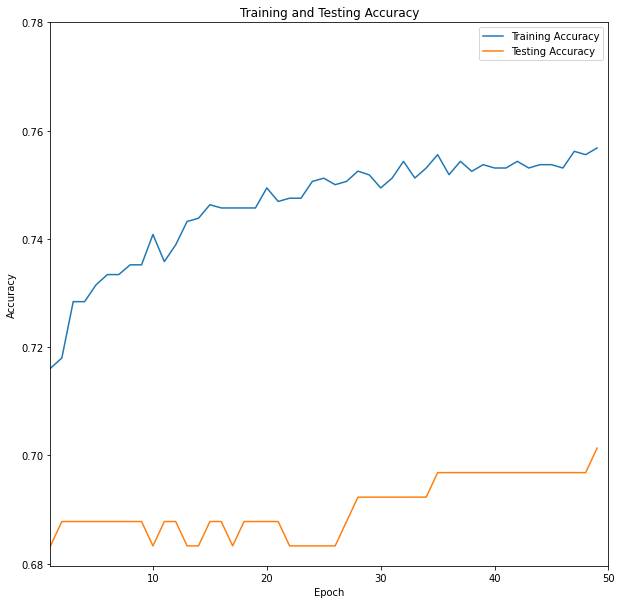

In [16]:
acc1 = [0.7161,0.7161,0.7180,0.7284,0.7284,0.7315,0.7334,0.7334,0.7352,0.7352,0.7408,0.7358,0.7389,0.7432,0.7438]
val_acc1 = [0.6833,0.6833,0.6878,0.6878,0.6878,0.6878,0.6878,0.6878,0.6878,0.6878,0.6833,0.6878,0.6878,0.6833,0.6833]

acc2 = [0.7463,0.7457,0.7457,0.7457,0.7457,0.7494,0.7469,0.7475]
val_acc2 = [0.6878,0.6878,0.6833,0.6878,0.6878,0.6878,0.6878,0.6833]

acc3 = [0.7475, 0.7506,0.7512,0.7500,0.7506,0.7525,0.7518,0.7494,0.7512,0.7543]
val_acc3 = [0.6833,0.6833,0.6833,0.6833,0.6878,0.6923,0.6923,0.6923,0.6923,0.6923]

acc4 = history.history['accuracy']
val_acc4 = history.history['val_accuracy']

acc = np.concatenate((acc1,acc2,acc3,acc4))
val_acc = np.concatenate((val_acc1, val_acc2,val_acc3,val_acc4))


plt.figure(figsize=(10, 10))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Testing Accuracy')
plt.legend(loc='Upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.78])
plt.xlabel('Epoch')
plt.xlim(1,50)
plt.title('Training and Testing Accuracy')

In [17]:
# save model 
model_path = os.path.join(SAVE_PATH, 'model_final') + '.h5'
model.save(model_path)

# save model WEIGHT
weight_path = os.path.join(SAVE_PATH, 'model_weights') + '.h5'
model.save_weights(weight_path)

In [11]:
loaded_model =  keras.models.load_model('drive/ML/model/model_final.h5')
loaded_model.load_weights("drive/ML/model/model_weights.h5")
loaded_model.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])
score = loaded_model.evaluate(test_batches, verbose=0)

In [12]:
print("%s in testing data: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy in testing data: 70.14%


In [13]:
print('Total number of parameter :',loaded_model.count_params())

Total number of parameter : 143669242
